In [1]:
import pandas as pd

In [2]:
# import pandas as pd
# import io
# import requests
# url=""
# s=requests.get(url).text
# c=pd.read_csv(io.StringIO(s))

In [3]:
# Dataset: https://www.kaggle.com/c/fake-news/data#
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
df_train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [13]:
# Dropping the label from train dataset
# X = df_train.drop('label', axis=1)
# X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [14]:
# Geting the label seprately
# y = df_train[['label']]
# y.head()

,label
0,1
1,0
2,1
3,1
4,1


In [15]:
# X.shape, y.shape

((20800, 4), (20800, 1))

In [6]:
df_train.shape

(20800, 5)

In [8]:
df_train.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [11]:
# Droping the null values
df_train.dropna(inplace=True)
print(df_train.shape)
df_train.reset_index(drop=True, inplace=True)
df_train.isnull().sum()

(18285, 5)


id        0
title     0
author    0
text      0
label     0
dtype: int64

In [12]:
df_train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [10]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [13]:
messages = df_train.copy()

In [15]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re

In [16]:
lemmatizer = WordNetLemmatizer()

In [17]:
corpus = []
for word in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ',messages['text'][word])
    review = review.lower()
    review = review.split()
    review = [lemmatizer.lemmatize(i) for i in review if not i in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [18]:
corpus[2]

'truth might get fired october tension intelligence analyst political policymakers always honest assessment desired result latter often overwhelming former iraq war writes lawrence davidson lawrence davidson might wonder foreign policy maker repeatedly make bad choice insight might drawn following analysis action play united state lesson probably universal back early spring george w bush initiated invasion iraq one key public reason claim country dictator saddam hussein verge developing nuclear weapon hiding weapon mass destruction real reason went beyond charge included long range plan regime change middle east president george w bush vice president dick cheney receive oval office briefing cia director george tenet also present chief staff andy card right white house photo purpose concentrate belief iraq become hostile nuclear power president bush close associate accept scenario readily short answer bush wanted indeed needed believe rationale invading iraq first tried connect saddam h

In [30]:
# TF-IDF vectoriser to convert words to vectors

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v = TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X = tfidf_v.fit_transform(corpus).toarray()

In [31]:
X.shape

(18285, 5000)

In [32]:
y = messages['label']

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 0)

In [34]:
tfidf_v.get_feature_names()[:20]

['aaron',
 'abandon',
 'abandoned',
 'abc',
 'abe',
 'abedin',
 'ability',
 'able',
 'abortion',
 'abroad',
 'absence',
 'absolute',
 'absolutely',
 'abu',
 'abuse',
 'academic',
 'academy',
 'accept',
 'acceptable',
 'acceptance']

In [35]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [36]:
# Creating Dataframe just to visualize features

count_df = pd.DataFrame(X_train, columns = tfidf_v.get_feature_names())
count_df.head()

,aaron,abandon,abandoned,abc,abe,abedin,ability,able,abortion,abroad,...,young,young people,younger,youth,youtube,zero,zika,zionist,zone,zu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017397,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.026064,0.0,0.0,0.025182,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022384,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0


In [38]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Training 

### MultinomialNB Algorithm 

In [39]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [40]:
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.896
Confusion matrix, without normalization


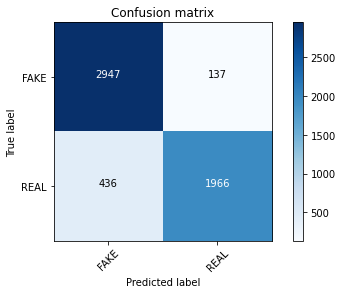

In [42]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

### [Passive Aggressive Classifier Algorithm] (https://www.geeksforgeeks.org/passive-aggressive-classifiers/)

In [46]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier()

accuracy:   0.947
Confusion matrix, without normalization


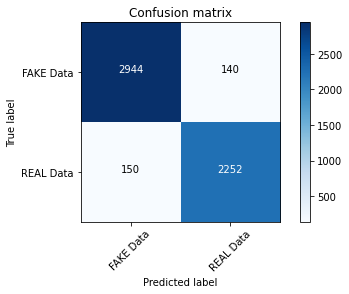

In [47]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

### Multinomial Classifier with Hyperparameter

In [48]:
classifier=MultinomialNB(alpha=0.1)

In [49]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))


Alpha: 0.0, Score : 0.8971928545388261
Alpha: 0.1, Score : 0.8960991615020051
Alpha: 0.2, Score : 0.8957345971563981
Alpha: 0.30000000000000004, Score : 0.8959168793292016
Alpha: 0.4, Score : 0.8959168793292016
Alpha: 0.5, Score : 0.8962814436748086
Alpha: 0.6000000000000001, Score : 0.8957345971563981
Alpha: 0.7000000000000001, Score : 0.8953700328107911
Alpha: 0.8, Score : 0.8953700328107911
Alpha: 0.9, Score : 0.8951877506379876
